In [1]:
import tensorflow as tf 

In [2]:
print(tf.__version__)

2.3.0


In [3]:
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation
from tensorflow.keras.activations import sigmoid,softmax,relu
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv("Datasets/churn dataset/churn_Modelling.csv")

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [52]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7462,610,France,Male,40,9,0.00,1,1,1,149602.54,0
8268,787,Germany,Female,42,2,74483.97,2,0,1,44273.91,0
8095,850,Germany,Female,36,6,143644.16,1,1,0,22102.25,1
120,828,France,Male,34,8,129433.34,2,0,0,38131.77,0
1944,783,Spain,Male,39,9,0.00,2,1,0,143752.77,0


In [53]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]


In [54]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [55]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [56]:
X['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [57]:
a = pd.get_dummies(X['Gender'],drop_first = True)

In [58]:
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [59]:
b = pd.get_dummies(X['Geography'],drop_first = True)
b.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [60]:
X = X.drop(['Geography','Gender'],axis = 1)


In [61]:
X = pd.concat([X,a,b],axis = 1)


In [62]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


#### Freature Standardization

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)

In [65]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
X_train

array([[ 1.67588802, -0.94183739,  0.00934296, ..., -1.10022343,
         1.74875572, -0.57987798],
       [ 0.30320673, -0.17987213,  1.04687659, ...,  0.9089063 ,
         1.74875572, -0.57987798],
       [-0.10235819,  0.96307575, -0.33650158, ...,  0.9089063 ,
         1.74875572, -0.57987798],
       ...,
       [ 0.86475817, -0.08462648, -1.37403521, ..., -1.10022343,
        -0.57183516, -0.57987798],
       [ 0.15761932,  0.39160181,  1.04687659, ...,  0.9089063 ,
        -0.57183516, -0.57987798],
       [ 0.46959234,  1.15356706, -1.37403521, ...,  0.9089063 ,
         1.74875572, -0.57987798]])

In [67]:
X_train[0]

array([ 1.67588802, -0.94183739,  0.00934296,  0.47861826, -0.90471845,
       -1.54618507, -1.03555714,  1.50493673, -1.10022343,  1.74875572,
       -0.57987798])

### Build ANN Model with TensorFlow

In [68]:
X.shape[1]

11

In [74]:
model = Sequential()
model.add(Dense(units = 128 , kernel_initializer = 'he_uniform' ,  activation = 'relu',input_dim = X.shape[1]))
model.add(Dense(units = 64 , kernel_initializer = 'he_uniform',activation = 'relu'))
model.add(Dense(units = 32 , kernel_initializer = 'he_uniform',activation = 'relu'))
model.add(Dense(units = 1 , kernel_initializer = 'glorot_uniform' , activation = 'sigmoid'))

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [77]:
model.fit(X_train,y_train,batch_size = 10,epochs = 10,verbose= 1,validation_split=0.2)

Epoch 1/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8164 - val_loss: 0.3722 - val_accuracy: 0.8463
Epoch 2/10
536/536 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8422 - val_loss: 0.3580 - val_accuracy: 0.8463
Epoch 3/10
536/536 [==============================] - 1s 2ms/step - loss: 0.3529 - accuracy: 0.8524 - val_loss: 0.3484 - val_accuracy: 0.8515
Epoch 4/10
536/536 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8576 - val_loss: 0.3568 - val_accuracy: 0.8425
Epoch 5/10
536/536 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8584 - val_loss: 0.3549 - val_accuracy: 0.8522
Epoch 6/10
536/536 [==============================] - 2s 3ms/step - loss: 0.3258 - accuracy: 0.8619 - val_loss: 0.3515 - val_accuracy: 0.8493
Epoch 7/10
536/536 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8623 - val_loss: 0.3678 - val_accuracy: 0.8507
Epoch 

In [78]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [79]:
train_acc = model.history.history['accuracy']
train_acc

[0.816417932510376,
 0.842164158821106,
 0.8524253964424133,
 0.8576492667198181,
 0.858395516872406,
 0.861940324306488,
 0.862313449382782,
 0.8671641945838928,
 0.8682835698127747,
 0.8738806247711182]

In [80]:
train_loss = model.history.history['loss']
train_loss

[0.43250444531440735,
 0.3726527988910675,
 0.3528599739074707,
 0.34272411465644836,
 0.3357914090156555,
 0.3258398473262787,
 0.31876811385154724,
 0.3137795627117157,
 0.3041583299636841,
 0.29733842611312866]

In [81]:
val_accuracy = model.history.history['val_accuracy']
val_accuracy

[0.8462686538696289,
 0.8462686538696289,
 0.8514925241470337,
 0.8425372838973999,
 0.8522388339042664,
 0.8492537140846252,
 0.8507462739944458,
 0.845522403717041,
 0.8462686538696289,
 0.8574627041816711]

In [82]:
val_loss = model.history.history['val_loss']
val_loss

[0.372164785861969,
 0.35803738236427307,
 0.3483744263648987,
 0.35681959986686707,
 0.35491234064102173,
 0.35151320695877075,
 0.3677906095981598,
 0.35881662368774414,
 0.3558168411254883,
 0.37179791927337646]

In [84]:
import numpy as np

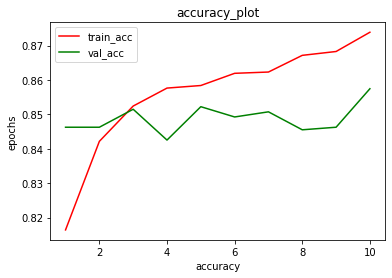

In [87]:
import matplotlib.pyplot as plt
plt.title('accuracy_plot')
plt.xlabel("accuracy")
plt.ylabel('epochs')
plt.plot(np.arange(1,11),train_acc,color = 'r',label = 'train_acc')
plt.plot(np.arange(1,11),val_accuracy,color = 'g',label = 'val_acc')
plt.legend(loc = 0)
plt.show()

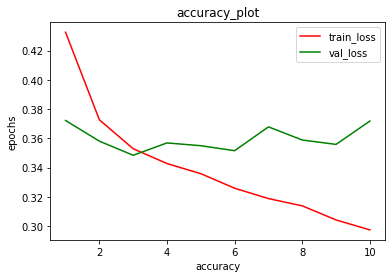

In [88]:
import matplotlib.pyplot as plt
plt.title('accuracy_plot')
plt.xlabel("accuracy")
plt.ylabel('epochs')
plt.plot(np.arange(1,11),train_loss,color = 'r',label = 'train_loss')
plt.plot(np.arange(1,11),val_loss,color = 'g',label = 'val_loss')
plt.legend(loc = 0)
plt.show()

### Testing accuracy for Test Data 

In [89]:
y_test_pred = model.predict_classes(X_test)

In [90]:
y_test_pred[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [91]:
y_test[:10]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

In [92]:
model.evaluate(X_test,y_test)

104/104 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8497


[0.36288902163505554, 0.8496969938278198]

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [94]:
accuracy_score(y_test,y_test_pred)

0.8496969696969697

In [95]:
confusion_matrix(y_test,y_test_pred)

array([[2444,  213],
       [ 283,  360]], dtype=int64)

In [96]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2657
           1       0.63      0.56      0.59       643

    accuracy                           0.85      3300
   macro avg       0.76      0.74      0.75      3300
weighted avg       0.84      0.85      0.85      3300



In [97]:
a = model.predict([[1,2,3,4,5,6,7,8,9,10,11]])

In [98]:
a

array([[3.0733634e-07]], dtype=float32)

In [99]:
if a > 0.5:
    print("True")
else:
    print("False")

False


In [100]:
len(y_test_pred)

3300

In [101]:
yp =[]
for i in range(len(y_test_pred)):
    if y_test_pred[i] > 0.5:
        yp.append(1)
    else:
        yp.append(0)

In [102]:
yp[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [103]:
accuracy_score(y_test,yp)

0.8496969696969697

In [113]:
!pip install mlxtend

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)


In [114]:
import mlxtend

In [115]:
from mlxtend.plotting import plot_confusion_matrix

In [116]:
from sklearn.metrics import confusion_matrix

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

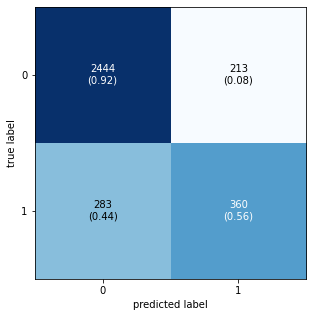

In [131]:
mat = confusion_matrix(y_test,yp)
plot_confusion_matrix(conf_mat = mat,figsize = (10,5),show_normed = True)

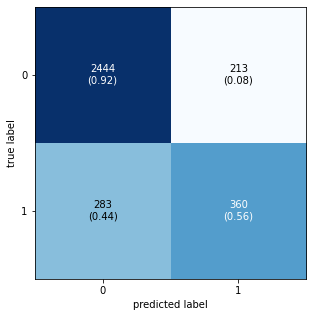

In [134]:
mat = confusion_matrix(y_test,yp)
fig,ax = plot_confusion_matrix(conf_mat = mat,figsize = (10,5),show_normed = True)
fig.savefig('kamal.png')